In [1]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 16,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 4]
})
import yfinance as yf

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[*********************100%%**********************]  1 of 1 completed


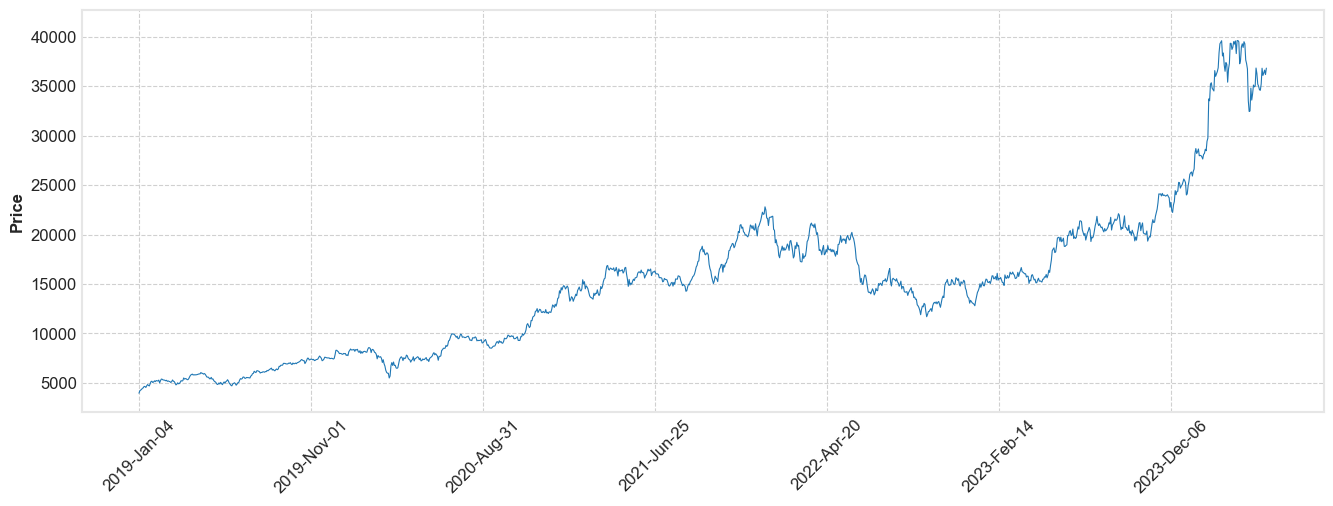

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-04,4006.666748,4016.666748,3865.000000,3961.666748,3466.173340,5653800
2019-01-07,4146.666504,4248.333496,4133.333496,4213.333496,3686.363281,5167500
2019-01-08,4233.333496,4301.666504,4181.666504,4280.000000,3744.691895,5411100
2019-01-09,4261.666504,4351.666504,4251.666504,4350.000000,3805.936523,3606900
2019-01-10,4360.000000,4470.000000,4346.666504,4463.333496,3905.095215,5907000
...,...,...,...,...,...,...
2024-05-17,36150.000000,36440.000000,35800.000000,36090.000000,36090.000000,3125600
2024-05-20,35800.000000,36590.000000,35650.000000,36340.000000,36340.000000,3148200
2024-05-21,36640.000000,36910.000000,36510.000000,36630.000000,36630.000000,2797400


In [2]:
start = dt.date(2019, 1, 1)
end = dt.date(2024, 5, 24)

#ticker = '6920.T' # レーザーテック
#ticker = '7735.T' # スクリーン
ticker = '8035.T' # 東京エレクトロン
#ticker = '^N225'
#ticker = 'USDJPY=X'
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [3]:
df = pd.DataFrame({'ds': df0.index, 'y': df0['Close']}).reset_index(drop=True)
df

,ds,y
0,2019-01-04,3961.666748
1,2019-01-07,4213.333496
2,2019-01-08,4280.000000
3,2019-01-09,4350.000000
4,2019-01-10,4463.333496
...,...,...
1307,2024-05-17,36090.000000
1308,2024-05-20,36340.000000
1309,2024-05-21,36630.000000
1310,2024-05-22,36180.000000


In [14]:
#m = Prophet()
m = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.1)

m.fit(df)

08:37:01 - cmdstanpy - INFO - Chain [1] start processing
08:37:02 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1337,2024-06-18
1338,2024-06-19
1339,2024-06-20
1340,2024-06-21
1341,2024-06-22


In [16]:
forecast = m.predict(future)
forecast2 = forecast[forecast['ds'].dt.dayofweek < 5]
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-04,3326.570478,-1306.863471,8455.155089,3326.570478,3326.570478,130.148612,130.148612,130.148612,-104.886330,-104.886330,-104.886330,235.034942,235.034942,235.034942,0.0,0.0,0.0,3456.719090
1,2019-01-07,3361.382432,-967.221228,8102.975154,3361.382432,3361.382432,167.774450,167.774450,167.774450,-279.201367,-279.201367,-279.201367,446.975817,446.975817,446.975817,0.0,0.0,0.0,3529.156881
2,2019-01-08,3372.986416,-823.619967,8621.219361,3372.986416,3372.986416,460.801409,460.801409,460.801409,-56.125014,-56.125014,-56.125014,516.926423,516.926423,516.926423,0.0,0.0,0.0,3833.787825
3,2019-01-09,3384.590401,-534.006460,8073.817530,3384.590401,3384.590401,528.331823,528.331823,528.331823,-56.568327,-56.568327,-56.568327,584.900150,584.900150,584.900150,0.0,0.0,0.0,3912.922224
4,2019-01-10,3396.194386,-733.013732,8536.151269,3396.194386,3396.194386,628.920377,628.920377,628.920377,-21.021976,-21.021976,-21.021976,649.942353,649.942353,649.942353,0.0,0.0,0.0,4025.114763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,2024-06-17,26431.880068,21303.143143,30542.960032,26431.879549,26431.880425,-684.334267,-684.334267,-684.334267,-279.201367,-279.201367,-279.201367,-405.132899,-405.132899,-405.132899,0.0,0.0,0.0,25747.545802
1337,2024-06-18,26443.487744,21446.200435,30586.286219,26443.487129,26443.488210,-464.906837,-464.906837,-464.906837,-56.125014,-56.125014,-56.125014,-408.781822,-408.781822,-408.781822,0.0,0.0,0.0,25978.580907
1338,2024-06-19,26455.095419,21136.715972,30445.320651,26455.094706,26455.095969,-469.175907,-469.175907,-469.175907,-56.568327,-56.568327,-56.568327,-412.607580,-412.607580,-412.607580,0.0,0.0,0.0,25985.919513
1339,2024-06-20,26466.703095,21388.422646,30792.308546,26466.702271,26466.703741,-438.439026,-438.439026,-438.439026,-21.021976,-21.021976,-21.021976,-417.417051,-417.417051,-417.417051,0.0,0.0,0.0,26028.264069


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


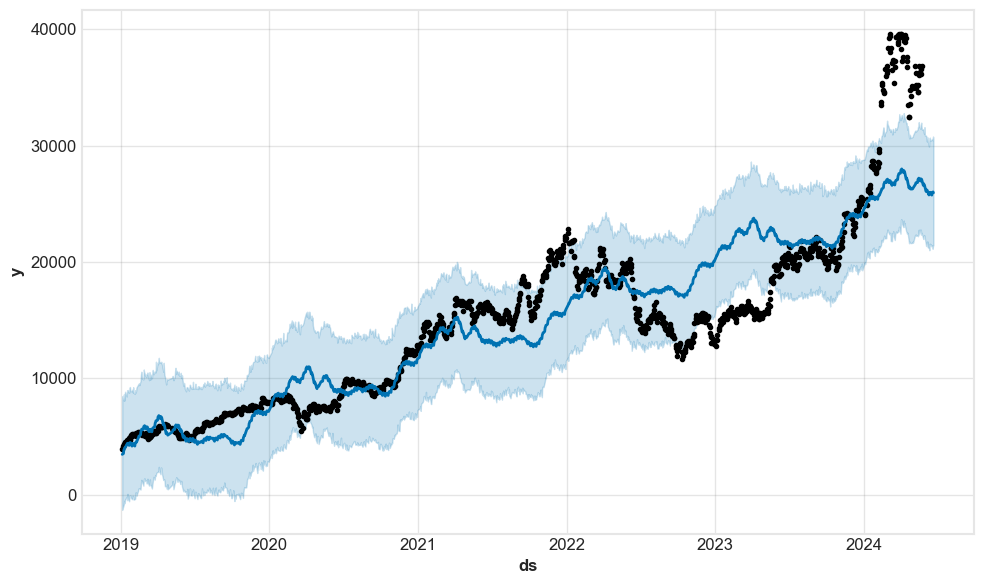

In [17]:
fig1 = m.plot(forecast2)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

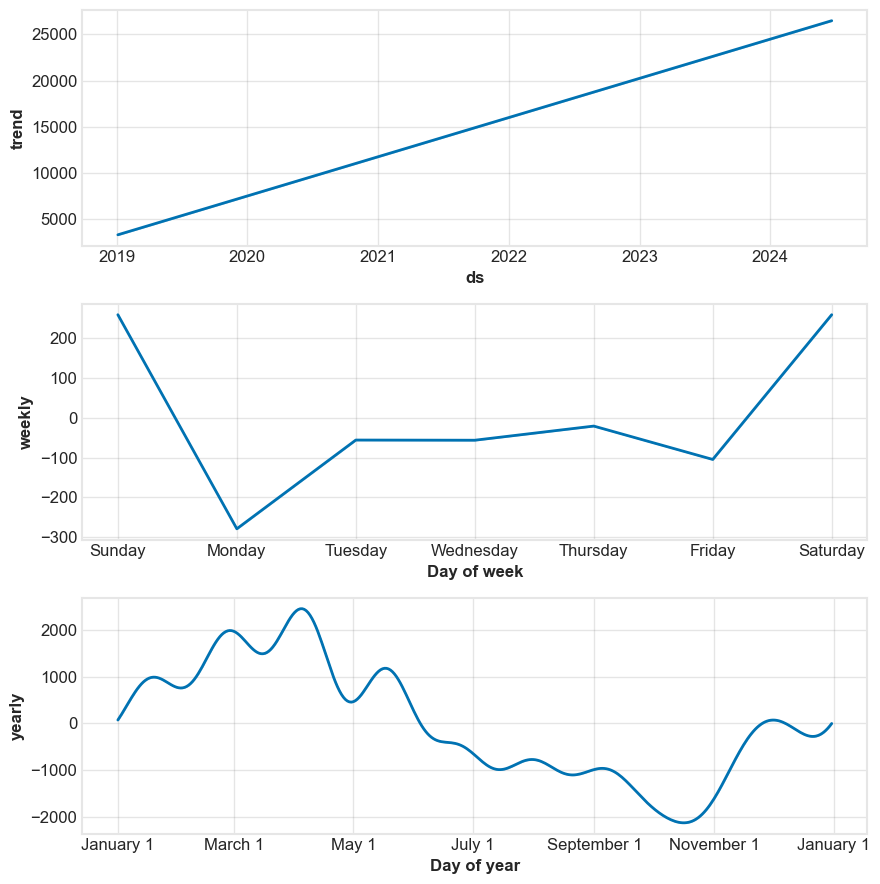

In [18]:
fig2 = m.plot_components(forecast2)

In [9]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|                                                     | 0/5 [00:00<?, ?it/s]08:31:58 - cmdstanpy - INFO - Chain [1] start processing
08:31:58 - cmdstanpy - INFO - Chain [1] done processing
 20%|█████████                                    | 1/5 [00:00<00:00,  7.68it/s]08:31:58 - cmdstanpy - INFO - Chain [1] start processing
08:31:58 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00,  6.98it/s]08:31:58 - cmdstanpy - INFO - Chain [1] start processing
08:31:58 - cmdstanpy - INFO - Chain [1] done processing
 60%|███████████████████████████                  | 3/5 [00:00<00:00,  6.12it/s]08:31:58 - cmdstanpy - INFO - Chain [1] start processing
08:31:58 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  5.71it/s]08:31:58 - cmdstanpy - INFO - Chain [1] start processing
08:31:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████████████████████████

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-04,15994.151339,15572.357464,16421.545021,16150.000000,2021-06-03
1,2021-06-07,16047.742427,15615.469795,16465.834757,16183.333008,2021-06-03
2,2021-06-08,16118.846083,15703.604286,16563.517349,16090.000000,2021-06-03
3,2021-06-09,16130.034468,15705.605071,16552.079034,15606.666992,2021-06-03
4,2021-06-10,16157.731871,15752.311052,16587.883331,15856.666992,2021-06-03


In [10]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,8.035819e+06,2834.752001,2009.207952,0.112546,0.067019,0.117737,0.395492
1,36 days,8.624169e+06,2936.693591,2100.609919,0.118072,0.067445,0.123060,0.371585
2,37 days,9.157674e+06,3026.164880,2174.428144,0.122528,0.068322,0.127414,0.360656
3,38 days,9.417989e+06,3068.874247,2216.023731,0.125526,0.069652,0.129848,0.352459
4,39 days,9.696023e+06,3113.843691,2272.914995,0.129460,0.072476,0.133205,0.336066


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


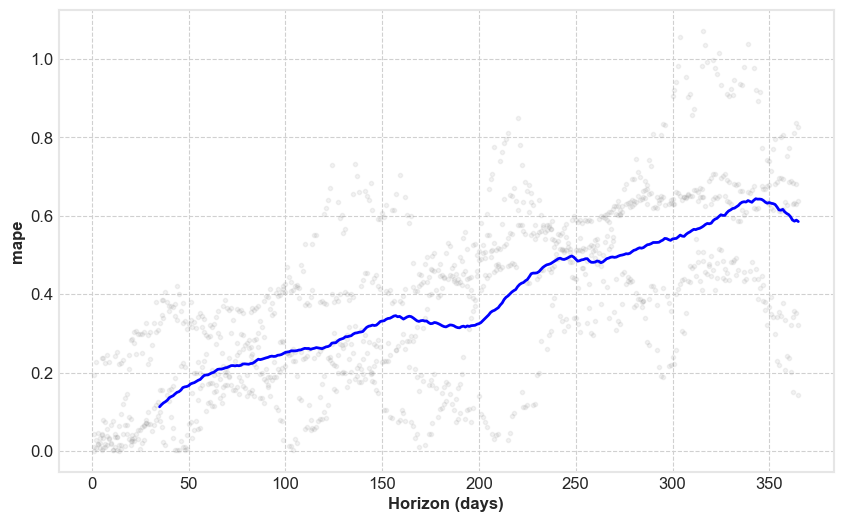

In [11]:
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [12]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

08:32:10 - cmdstanpy - INFO - Chain [1] start processing
08:32:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|                                                     | 0/5 [00:00<?, ?it/s]08:32:10 - cmdstanpy - INFO - Chain [1] start processing
08:32:10 - cmdstanpy - INFO - Chain [1] done processing
08:32:10 - cmdstanpy - INFO - Chain [1] start processing
08:32:10 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00, 10.82it/s]08:32:10 - cmdstanpy - INFO - Chain [1] start processing
08:32:11 - cmdstanpy - INFO - Chain [1] done processing
08:32:11 - cmdstanpy - INFO - Chain [1] start processing
08:32:11 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.68it/s]08:32:11 - cmdstanpy - INFO - Chain [1] start processing
08:32:11 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  9.62it/s]
0

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  5820.901570
1                     0.001                     0.10  5659.506808
2                     0.001                     1.00  5690.796573
3                     0.001                    10.00  5711.246334
4                     0.010                     0.01  9712.725322
5                     0.010                     0.10  9807.510819
6                     0.010                     1.00  9705.075429
7                     0.010                    10.00  9753.346373
8                     0.100                     0.01  8948.932079
9                     0.100                     0.10  9003.790361
10                    0.100                     1.00  9110.244696
11                    0.100                    10.00  9079.321311
12                    0.500                     0.01  7608.899909
13                    0.500                     0.10  8470.924829
14        

In [13]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}
